# **Applied Machine Learning Homework 5**
**Due 02 Dec 2023 (Tuesday) 11:59PM EST**

Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).

2) Please include your Name and UNI below.

## Name : Youjia(Jessica) Li

## UNI : yl5542

## Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [94]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

2023-12-01 01:21:27.573110: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [96]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:
1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [97]:
num_class = 10

In [3]:
#Your code here

model = Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=120,kernel_size=(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(units=84,activation='relu'))
model.add(Dense(num_class,activation='softmax'))

model.compile()

3.2 Report the model summary

In [4]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

 dense_1 (Dense)             (None, 10)                850       
                                                                 
Total params: 92246 (360.34 KB)
Trainable params: 92246 (360.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [5]:
#Your code here

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Model=model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 52s 41ms/step - loss: 1.6599 - accuracy: 0.3988 - val_loss: 1.4059 - val_accuracy: 0.4953
Epoch 2/20
1250/1250 [==============================] - 49s 39ms/step - loss: 1.3320 - accuracy: 0.5253 - val_loss: 1.3184 - val_accuracy: 0.5295
Epoch 3/20
1250/1250 [==============================] - 48s 38ms/step - loss: 1.1901 - accuracy: 0.5774 - val_loss: 1.1494 - val_accuracy: 0.5973
Epoch 4/20
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0923 - accuracy: 0.6141 - val_loss: 1.1195 - val_accuracy: 0.6109
Epoch 5/20
1250/1250 [==============================] - 48s 39ms/step - loss: 1.0200 - accuracy: 0.6458 - val_loss: 1.0757 - val_accuracy: 0.6266
Epoch 6/20
1250/1250 [==============================] - 49s 40ms/step - loss: 0.9590 - accuracy: 0.6650 - val_loss: 1.0934 - val_accuracy: 0.6174
Epoch 7/20
1250/1250 [==============================] - 47s 38ms/step - loss: 0.9049 - accuracy: 0.6853 - val_loss: 1.0847 -

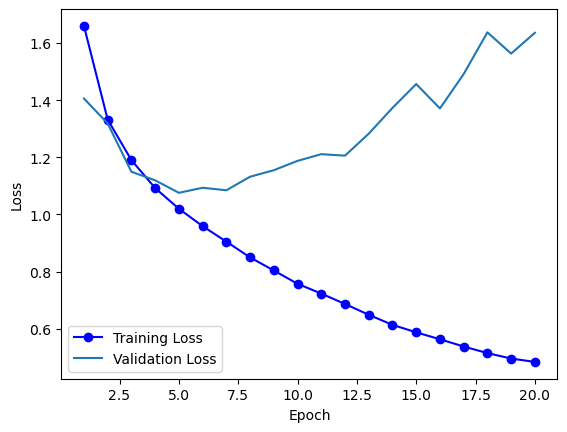

In [6]:
# #Your code here
hist = pd.DataFrame(Model.history)
fig, ax = plt.subplots()
ax.plot(range(1, len(hist) + 1), hist["loss"], 'bo-', label="Training Loss")
ax.plot(range(1, len(hist) + 1), hist["val_loss"], label="Validation Loss")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
ax.legend()
plt.show()

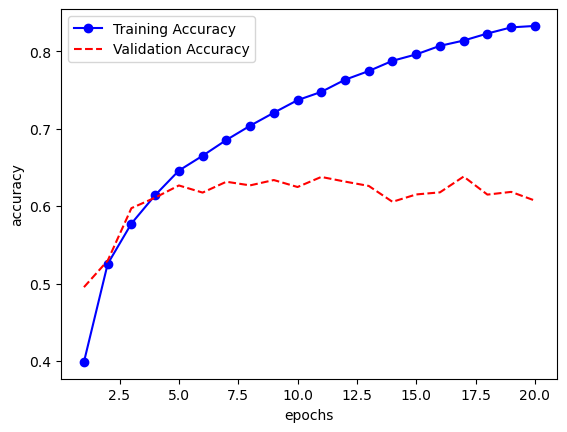

In [7]:
#Your code here
fig, ax = plt.subplots()
ax.plot(range(1, len(hist) + 1), hist["accuracy"], 'bo-', label="Training Accuracy")
ax.plot(range(1, len(hist) + 1), hist["val_accuracy"],'r--', label="Validation Accuracy")
ax.set_ylabel("accuracy")
ax.set_xlabel("epochs")
ax.legend()
plt.show()

In [8]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 1.659
Test Accuracy: 0.604


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

3.4.1 Dropout

In [101]:
#Your code here

model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_dropout.add(keras.layers.Dropout(0.3))

model_dropout.add(keras.layers.MaxPool2D(2, 2))
model_dropout.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_dropout.add(keras.layers.Dropout(0.3))

model_dropout.add(keras.layers.MaxPool2D(2, 2))
model_dropout.add(keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model_dropout.add(keras.layers.Dropout(0.3))

model_dropout.add(Flatten())
model_dropout.add(keras.layers.Dense(units=84, activation='relu'))
model_dropout.add(keras.layers.Dropout(0.3))
model_dropout.add(keras.layers.Dense(num_class, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Model_dropout=model_dropout.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

score = model_dropout.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Epoch 1/20
1250/1250 [==============================] - 80s 58ms/step - loss: 1.7807 - accuracy: 0.3380 - val_loss: 1.6595 - val_accuracy: 0.4162
Epoch 2/20
1250/1250 [==============================] - 71s 57ms/step - loss: 1.5081 - accuracy: 0.4498 - val_loss: 1.4753 - val_accuracy: 0.4898
Epoch 3/20
1250/1250 [==============================] - 81s 65ms/step - loss: 1.4185 - accuracy: 0.4897 - val_loss: 1.4234 - val_accuracy: 0.5166
Epoch 4/20
1250/1250 [==============================] - 86s 68ms/step - loss: 1.3435 - accuracy: 0.5205 - val_loss: 1.3928 - val_accuracy: 0.5062
Epoch 5/20
1250/1250 [==============================] - 81s 65ms/step - loss: 1.2990 - accuracy: 0.5389 - val_loss: 1.3047 - val_accuracy: 0.5446
Epoch 6/20
1250/1250 [==============================] - 76s 61ms/step - loss: 1.2598 - accuracy: 0.5517 - val_loss: 1.2982 - val_accuracy: 0.5428
Epoch 7/20
1250/1250 [==============================] - 73s 58ms/step - loss: 1.2238 - accuracy: 0.5660 - val_loss: 1.3210 -

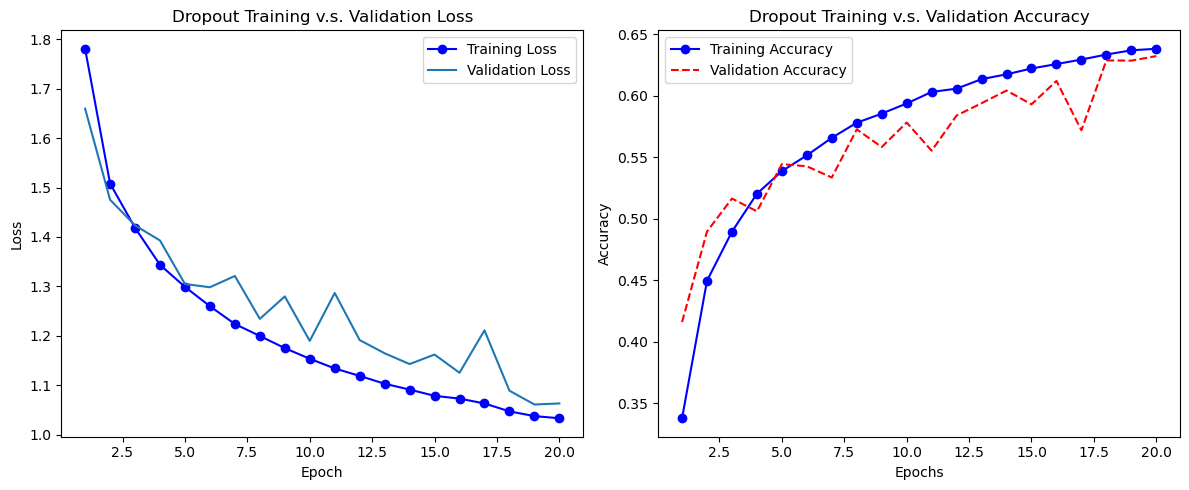

In [102]:
#Your code here
hist_dropout = pd.DataFrame(Model_dropout.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# training and validation loss
ax1.plot(range(1, len(hist_dropout) + 1), hist_dropout["loss"], 'bo-', label="Training Loss")
ax1.plot(range(1, len(hist_dropout) + 1), hist_dropout["val_loss"], label="Validation Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.legend()
ax1.set_title("Dropout Training v.s. Validation Loss")

# training and validation accuracy
ax2.plot(range(1, len(hist_dropout) + 1), hist_dropout["accuracy"], 'bo-', label="Training Accuracy")
ax2.plot(range(1, len(hist_dropout) + 1), hist_dropout["val_accuracy"], 'r--', label="Validation Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
ax2.legend()
ax2.set_title("Dropout Training v.s. Validation Accuracy")

plt.tight_layout()
plt.show()

3.4.2 Batch Normalisation

In [104]:
#Your code here
model_bn = keras.Sequential()
model_bn.add(keras.Input(shape=(32, 32, 3)))
model_bn.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model_bn.add(keras.layers.BatchNormalization())

model_bn.add(keras.layers.MaxPool2D(2, 2))
model_bn.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model_bn.add(keras.layers.BatchNormalization())

model_bn.add(keras.layers.MaxPool2D(2, 2))
model_bn.add(keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model_bn.add(keras.layers.BatchNormalization())

model_bn.add(Flatten())
model_bn.add(keras.layers.Dense(units=84, activation='relu'))
model_bn.add(keras.layers.BatchNormalization())
model_bn.add(keras.layers.Dense(num_class, activation='softmax'))

model_bn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Model_bn=model_bn.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 91s 70ms/step - loss: 1.5023 - accuracy: 0.4655 - val_loss: 1.6701 - val_accuracy: 0.4485
Epoch 2/20
1250/1250 [==============================] - 85s 68ms/step - loss: 1.1876 - accuracy: 0.5789 - val_loss: 1.5079 - val_accuracy: 0.5101
Epoch 3/20
1250/1250 [==============================] - 80s 64ms/step - loss: 1.0410 - accuracy: 0.6332 - val_loss: 1.8363 - val_accuracy: 0.4457
Epoch 4/20
1250/1250 [==============================] - 242s 194ms/step - loss: 0.9461 - accuracy: 0.6691 - val_loss: 1.0927 - val_accuracy: 0.6176
Epoch 5/20
1250/1250 [==============================] - 357s 285ms/step - loss: 0.8811 - accuracy: 0.6913 - val_loss: 1.0759 - val_accuracy: 0.6305
Epoch 6/20
1250/1250 [==============================] - 6447s 5s/step - loss: 0.8183 - accuracy: 0.7133 - val_loss: 1.2685 - val_accuracy: 0.5995
Epoch 7/20
1250/1250 [==============================] - 125s 100ms/step - loss: 0.7610 - accuracy: 0.7329 - val_loss: 1.

In [105]:
#Your code here
score = model_bn.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 1.419
Test Accuracy: 0.630


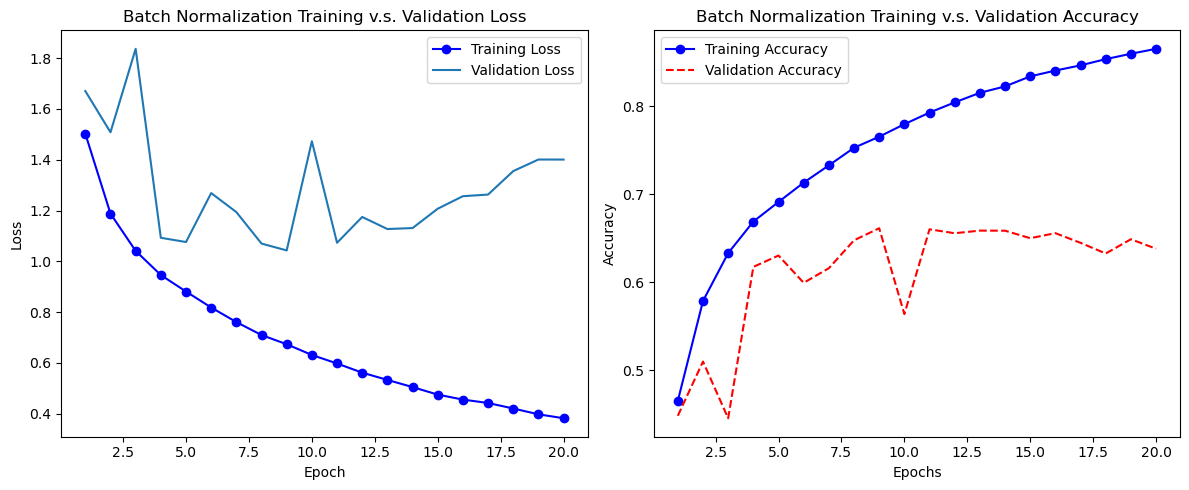

In [106]:
#Your code here
hist_bn = pd.DataFrame(Model_bn.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# training and validation loss
ax1.plot(range(1, len(hist_bn) + 1), hist_bn["loss"], 'bo-', label="Training Loss")
ax1.plot(range(1, len(hist_bn) + 1), hist_bn["val_loss"], label="Validation Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.legend()
ax1.set_title("Batch Normalization Training v.s. Validation Loss")

# training and validation accuracy
ax2.plot(range(1, len(hist_bn) + 1), hist_bn["accuracy"], 'bo-', label="Training Accuracy")
ax2.plot(range(1, len(hist_bn) + 1), hist_bn["val_accuracy"], 'r--', label="Validation Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
ax2.legend()
ax2.set_title("Batch Normalization Training v.s. Validation Accuracy")

plt.tight_layout()
plt.show()

Based on the test accuracy, we can see that the model with drop out layer has improved to 0.632 and the model with batch normalization layers has improved to 0.630, comparing to the original model which has test accuracy of 0.604. Comparing the results, we can see that the drop out layer is slightly more effective in resolving the overfitting problem, this might because dropout imitates the esemble method, which has proven to be practically effective in improving the model.

## Natural Language Processing

We will train a supervised learning model to predict if a movie review has a positive or negative sentiment.

###**Dataset loading & dev/test splits**

1.1) Load the movie reviews dataset from NLTK library

In [1]:
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import movie_reviews
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/youjia/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/youjia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/youjia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.2) Load the positive & negative reviews

In [4]:
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.raw(fileid)
    positive_reviews.append(words)

negative_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.raw(fileid)
    negative_reviews.append(words)

1.3) Make a data frame that has all reviews and their corresponding labels

In [8]:
# Your code here

review_df = pd.DataFrame({'review': positive_reviews + negative_reviews,
                   'label': ['positive'] * len(positive_reviews) + ['negative'] * len(negative_reviews)})


,review,label
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you've got mail works alot better than it dese...,positive
3,""" jaws "" is a rare film that grabs your atten...",positive
4,moviemaking is a lot like being the general ma...,positive


1.4) Look at the class distribution of the movie reviews

In [10]:
# Your code here
class_distribution = review_df['label'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
positive    1000
negative    1000
Name: label, dtype: int64


1.5) Create a development & test split (80/20 ratio):

In [67]:
# Your code here

from sklearn.model_selection import train_test_split
df_X = review_df['review']
df_Y = review_df['label']
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)


## **Data preprocessing**

We will do some data preprocessing before we tokenize the data. You can use the re package in python to remove and and replace these strings.

1.6) Replace numbers in every review with ""

In [68]:
# Your code here
X_dev = X_dev.str.replace(r'\d+', '')
X_test = X_test.str.replace(r'\d+', '')

1.7) Remove all stop words

In [71]:
# Your code here
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stop_words(text):
    vector = CountVectorizer(stop_words='english')
    X = vector.fit_transform([text])
    filtered_text = vector.get_feature_names_out()
    return ' '.join(filtered_text)


X_dev = [remove_stop_words(sentence) for sentence in X_dev]
X_test = [remove_stop_words(sentence) for sentence in X_test]


1.8) Remove all punctuations

In [75]:
# Your code here

X_dev = [re.sub(r'[^\w\s]', '', text) for text in X_dev]
X_test = [re.sub(r'[^\w\s]', '', text) for text in X_test]

1.9) Apply stemming on the development & test datasets using Porter algorithm

In [77]:
# Your code here
from nltk.tokenize import word_tokenize

porter = PorterStemmer()

def stemSentence (sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)


X_dev = [stemSentence(sentence) for sentence in X_dev]
X_test = [stemSentence(sentence) for sentence in X_test]


1.10) Looking at the dataset do you think any other data pre-processing might be helpful? You can experiment with the features if you want to.

Lemmatization can also be a pre-processing techniques to consider, in order to convert words into its meaningful base. It considers the context before conversion, so that could be a better techniques than stemming as it only does brute removal. 

### 2) Model Training

2.1) Create bag of words features for each review in the development dataset

In [89]:
# Your code here

vector = CountVectorizer()
X_dev_BOW = vector.fit_transform(X_dev)
X_test_BOW = vector.transform(X_test)

2.2) Train a Logistic Regression model on the development dataset

In [90]:
# Your code here
from sklearn.linear_model import LogisticRegressionCV
lr_BOW = LogisticRegressionCV().fit(X_dev_BOW,y_dev)

2.3) Create TF-IDF features for each review in the development dataset

In [82]:
# Your code here
vector_tf = TfidfVectorizer()
X_dev_tf = vector_tf.fit_transform(X_dev)
X_test_tf = vector_tf.transform(X_test)

2.4) Train the Logistic Regression model on the development dataset with TF-IDF features

In [83]:
# Your code here
lr_tf = LogisticRegressionCV().fit(X_dev_tf,y_dev)

0.8125

2.5) Compare the performance of the two models on the test dataset using a classication
report and the scores obtained. Explain the difference in results obtained.

In [92]:
# Your code here
from sklearn.metrics import classification_report

y_pred_BOW = lr_BOW.predict(X_test_BOW)
y_pred_tf = lr_tf.predict(X_test_tf)
print("classification_report for the model with Bag of Word feature", classification_report(y_test, y_pred_BOW))
print("classification_report for the model with TF-IDF feature", classification_report(y_test, y_pred_tf))
print("accuracy for the model with Bag of Word feature", lr_BOW.score(X_test_BOW,y_test))
print("accuracy for the model with TF-IDF feature", lr_tf.score(X_test_tf,y_test))


classification_report for the model with Bag of Word feature               precision    recall  f1-score   support

    negative       0.83      0.79      0.81       201
    positive       0.79      0.83      0.81       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

classification_report for the model with TF-IDF feature               precision    recall  f1-score   support

    negative       0.82      0.80      0.81       201
    positive       0.80      0.82      0.81       199

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

accuracy for the model with Bag of Word feature 0.81
accuracy for the model with TF-IDF feature 0.8125


Overall, both models perform similarly on the given dataset, which means that the choice between Bag of Words and TF-IDF may not be a decisive factor in this case. However, we can see that the TF-IDF model might perform slightly better, which might because it can capture term importance and handle common words more effectively by adjusting the weight, while the bag of words model can missing out on this nuances.